In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'dataset_v1.csv'
sales_data = pd.read_csv(file_path)
years = [2018, 2019, 2020, 2021]
proportion_of_sales = {}

total_accounts = len(sales_data)

for year in years:
    year_data = sales_data[sales_data['Year'] == year]
    monthly_sales = {}
    for month in range(1, 13): 
        sales_count = (year_data[str(month)] > 0).sum()
        proportion = sales_count / total_accounts
        monthly_sales[month] = proportion
    proportion_of_sales[year] = monthly_sales

proportion_of_sales_df = pd.DataFrame(proportion_of_sales)

proportion_of_sales_df
proportion_of_sales_df.to_csv("proportion_of_sales_df.csv",index=True)

In [ ]:
#Read in the datasets
import pandas as pd
import matplotlib.pyplot as plt

event = pd.read_csv("event_df.csv")
proportion = pd.read_csv("proportion_of_sales_df.csv")

print(event.head())
print(proportion.head())


   Unnamed: 0  2018  2019  2020  2021
0           1     1     2     3     5
1           2     0     0     0     2
2           3     4     1     0     3
3           4     4     2     0     0
4           5     0     3     0     1
   Unnamed: 0      2018      2019      2020      2021
0           1  0.005066  0.005030  0.005235  0.003868
1           2  0.005350  0.005654  0.004973  0.004204
2           3  0.005234  0.005716  0.004413  0.004532
3           4  0.005673  0.005742  0.000237  0.004188
4           5  0.005541  0.005175  0.003589  0.004114


In [2]:
#Drop the unnamed index column from both dataset
event = event.drop(columns=['Unnamed: 0'])
proportion = proportion.drop(columns=['Unnamed: 0'])

In [3]:
print(event)

    2018  2019  2020  2021
0      1     2     3     5
1      0     0     0     2
2      4     1     0     3
3      4     2     0     0
4      0     3     0     1
5      1     2     0     0
6      0     2     1     0
7      5     0     2     0
8      7     3     3     0
9      6     8     0     2
10     0     0     0     1
11     0     0     0     0


In [3]:
#Adjust the arrangement of the columns

#For the event, merge the dataframe into one column that list the event from 2018 Jan to 2021 Dec
event_numbers = event.T.stack().reset_index(drop=True)
event_numbers_df = pd.DataFrame({'event number': event_numbers})
print(event_numbers_df)

    event number
0              1
1              0
2              4
3              4
4              0
5              1
6              0
7              5
8              7
9              6
10             0
11             0
12             2
13             0
14             1
15             2
16             3
17             2
18             2
19             0
20             3
21             8
22             0
23             0
24             3
25             0
26             0
27             0
28             0
29             0
30             1
31             2
32             3
33             0
34             0
35             0
36             5
37             2
38             3
39             0
40             1
41             0
42             0
43             0
44             0
45             2
46             1
47             0


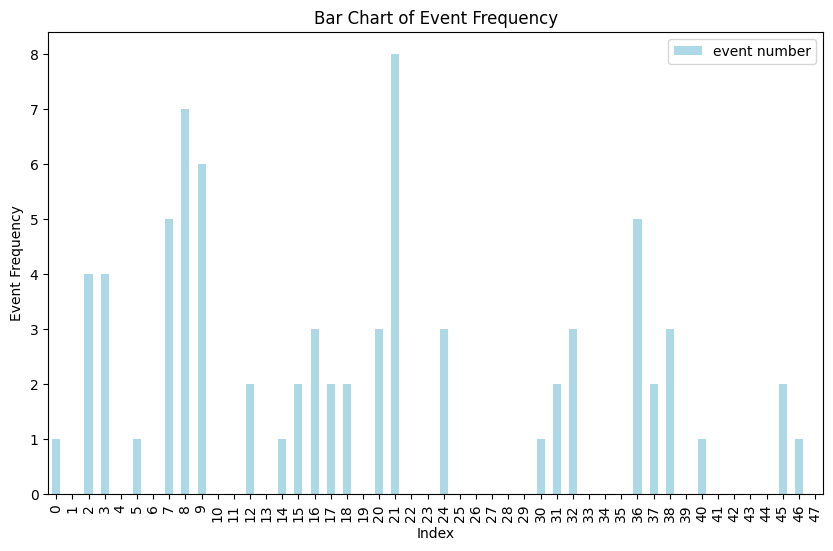

In [ ]:
event_numbers_df.plot(kind='bar', figsize=(10, 6), color='lightblue')
plt.title('Bar Chart of Event Frequency')
plt.xlabel('Index')  # Adjust if the index has specific meaning
plt.ylabel('Event Frequency')
plt.show()

In [ ]:
print(proportion)

In [4]:
#Use the same method and apply it to the proportion dataset
proportion_sales = proportion.T.stack().reset_index(drop=True)
proportion_sales_df = pd.DataFrame({'proportion of sales': proportion_sales})
print(proportion_sales_df)

    proportion of sales
0              0.005066
1              0.005350
2              0.005234
3              0.005673
4              0.005541
5              0.004474
6              0.004488
7              0.004229
8              0.004714
9              0.005066
10             0.004969
11             0.004640
12             0.005030
13             0.005654
14             0.005716
15             0.005742
16             0.005175
17             0.004424
18             0.004619
19             0.004933
20             0.004721
21             0.004952
22             0.004723
23             0.004551
24             0.005235
25             0.004973
26             0.004413
27             0.000237
28             0.003589
29             0.003450
30             0.003555
31             0.003343
32             0.003562
33             0.003916
34             0.003884
35             0.004109
36             0.003868
37             0.004204
38             0.004532
39             0.004188
40             0

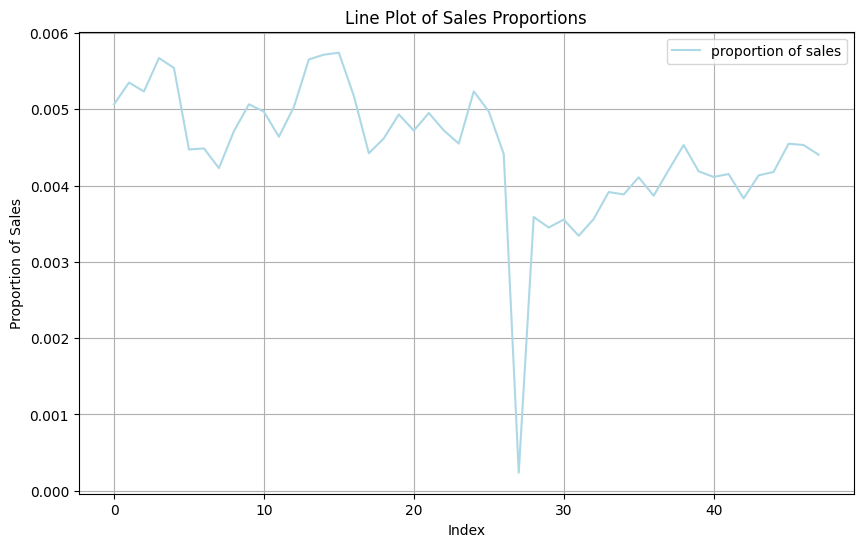

In [ ]:
proportion_sales_df.plot(kind='line', figsize=(10, 6), color='lightblue')  # 'o' for points on the line
plt.title('Line Plot of Sales Proportions')
plt.xlabel('Index')
plt.ylabel('Proportion of Sales')
plt.grid(True)
plt.show()

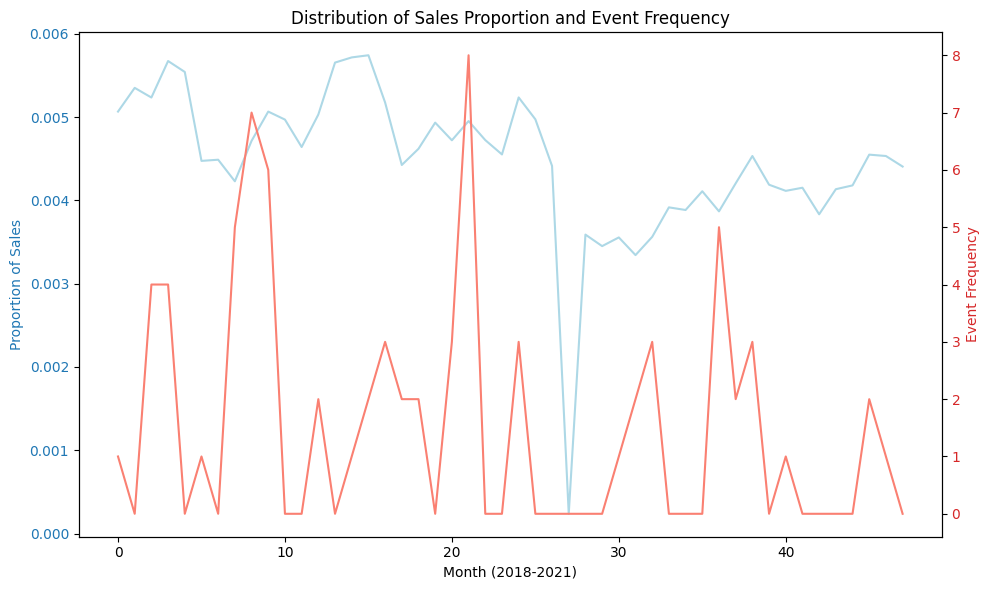

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first DataFrame on the first axis
color = 'tab:blue'
ax1.set_xlabel('Month (2018-2021)')
ax1.set_ylabel('Proportion of Sales', color=color)
ax1.plot(proportion_sales_df.index, proportion_sales_df['proportion of sales'], color='lightblue')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the second DataFrame
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Event Frequency', color=color)  # we already handled the x-label with ax1
ax2.plot(event_numbers_df.index, event_numbers_df['event number'], color='salmon')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Distribution of Sales Proportion and Event Frequency')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
#Calculate the correlation with these two columns

#Correlation Coefficient (R): To measure the strength and direction of the linear relationship between the number of events and the proportion of sales (determine positive or negative association)
#The value is between -1 and 1
import numpy as np

# Calculate correlation coefficient
correlation_matrix = np.corrcoef(event_numbers_df['event number'], proportion_sales_df['proportion of sales'])
correlation_coefficient = correlation_matrix[0, 1]
print("Correlation Coefficient (R):", correlation_coefficient)

Correlation Coefficient (R): 0.20246001902272598


In [10]:
#Regression Analysis: To quantify the effect of the number of events on the proportion of sales, how much the proportion of sales changes for each additional event
from sklearn.linear_model import LinearRegression


X = event_numbers_df['event number'].values.reshape(-1,1)
y = proportion_sales_df['proportion of sales']


model = LinearRegression()
model.fit(X, y)


print("Regression Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Regression Coefficient: 8.762877122848149e-05
Intercept: 0.004336541002030218


The original values of the proportion of sales are relatively small, which impacts the interpretation of regression results. Here’s what that means in the context of the analysis:

Contextualized Interpretation:
Regression Coefficient (8.76 × 10^-5):

Even though the regression coefficient appears small, it's crucial to relate it to the scale of the data. In the dataset, the proportion of sales values are in the range of approximately 0.003 to 0.006.
The coefficient of 0.0000876 indicates that for each additional event, the proportion of sales increases by this amount. While it seems small on an absolute scale, it's actually not negligible when compared to the original data range.
For instance, if the baseline proportion is around 0.005, an increase of 0.0000876 represents a change of about 1.75% relative to 0.005.

# What intercept mean
The intercept is the predicted value of the proportion of sales when the number of events is zero.
In this context, when there are no events, the proportion of sales is expected to be approximately 0.00434.
This is the baseline level of the proportion of sales without any events.

In [11]:
#Significance Test of the result
from scipy import stats

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(event_numbers_df['event number'], proportion_sales_df['proportion of sales'])

print("Correlation Coefficient (R):", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient (R): 0.20246001902272606
p-value: 0.16757129868451215


Statistical Significance: The p-value of 0.168 is greater than the commonly used threshold of 0.05 for significance. This means that there is not enough evidence to reject the null hypothesis, which states that there is no linear relationship between the number of events and the proportion of sales.
Interpretation: The high p-value indicates that the observed correlation is likely to have occurred by chance, and you cannot confidently say that the number of events has a significant effect on the proportion of sales.